# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

## Thông tin đồ án

+ Chủ đề: **Tìm hiểu về giá thuê chung cư ở thành phố Hồ Chí Minh**
+ Github: [p4ds-final](https://github.com/vanhung4499/p4ds-final)

### Thông tin nhóm

Nhóm chỉ có một thành viên duy nhất

| MSSV    | Họ và tên       |
|---------|-----------------|
| 1712222 | Nguyễn Văn Hùng |

## Môi trường làm việc

In [1]:
import sys
sys.executable

'/usr/local/anaconda3/envs/min_ds-env/bin/python'

Môi trường làm việc mà em dùng:
+ OS: macOS
+ IDE: Pycharm
+ Sử dụng mội trường `min_ds-evn` như các bài lab

## Import and constant

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
DATA_CSV = './data/hcm-apartment-rent-data.csv'

## 1. Thu thập dữ liệu

### 1.1. Chủ đề, mục đích và nguồn của dữ liệu?

+ Chủ đề em nhắm tới là về giá thuê chung cư ở thành phố Hồ Chí Minh
+ Do tìm trên kaggle chỉ có duy nhất một bộ dữ liệu về giá thuê chung cư của thành phố Hồ Chí Minh nhưng đã cũ và em cảm thấy nó ít không đủ các cột nên em đã tự crawl dữ liệu từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), trang môi giới xếp tốp đầu trong lĩnh vực bất động sản trên [Google](https://www.google.com/search?q=thu%C3%AA+chung+c%C6%B0+h%E1%BB%93+ch%C3%AD+minh&oq=thu%C3%AA+chung+c%C6%B0&aqs=chrome.1.69i59l3j0i512l2j69i60l3.4604j0j7&sourceid=chrome&ie=UTF-8)
+ Mục đích của em khá đơn giản là để xem xét giá cả chung cư cho thuê ở TPHCM, vì trong thời gian tới em cũng sẽ tìm chỗ ở mới (làm trước sau dùng lại)

### 1.2. Người ta có cho phép sử dụng dữ liệu như thế này hay không?

+ Việc crawl dữ liệu từ nhatot thông qua public api của chotot, nên có thể xem là là được phép sử dụng dữ liệu!
+ Đối với project này nhằm mục đích nâng cao kiến thức, không phục vụ múc đích thương mại

### 1.3. Thu thập dữ liệu này như thế nào?

+ Dữ liệu được em crawl từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), là trang môi giới về bất động sản lớn ở Việt Nam, web có rất nhiều tin cho thuê nhà
+ Em crawl dữ liệu toàn bộ 1000 trang thu về 20000 record
+ Chi tiết về cách crawl được mô tả ở file notebook `Crawl-data.ipynb`

## 2. Khám phá dữ liệu

### 2.1. Đọc dữ liệu

In [4]:
apartment_df = pd.read_csv(DATA_CSV)
apartment_df.head()

,ad_id,list_id,list_time,subject,body,price,price_string,size,rooms,toilets,...,region_name,ward_name,street_name,deposit,zero_deposit,longitude,latitude,owner,company_ad,apartment_type
0,139905225,101449743,1669427357000,"Căn hộ CMT8 Q10, Cửa sổ, Máy giặt riêng, Gác","Căn hộ Cách Mạng Tháng 8 Q10, Cửa sổ, Máy giặt...",9000000.0,9 triệu/tháng,30.0,1,1.0,...,Tp Hồ Chí Minh,Phường 13,Hẻm 499 Cách Mạng Tháng 8,0,False,106.67245,10.78176,False,True,Căn hộ dịch vụ
1,140064167,101580825,1669783016000,Căn Hộ 1PN _ Kcx Tân Thuận chợ UFM sát Quận 4🌈,⭐️Sắp hết tháng rồi khách đã tìm được phòng ch...,5700000.0,"5,7 triệu/tháng",37.0,1,1.0,...,Tp Hồ Chí Minh,Phường Bình Thuận,Đường Lý Phục Man,0,False,106.72563,10.74310,False,True,Căn hộ dịch vụ
2,139905234,101449753,1669427371000,KHAI TRƯƠNG CĂN HỘ BANCOL FULL NỘI THẤT,Cho thuê căn hộ\n_Vị trí : đường Thạch Lam p.p...,4500000.0,"4,5 triệu/tháng",35.0,1,1.0,...,Tp Hồ Chí Minh,Phường Phú Thạnh,Đường Thạch Lam,0,False,106.62711,10.77815,False,True,Căn hộ dịch vụ
3,140064185,101580839,1669783034000,Căn hộ ban công lớn cực Chill_Ngay Điện Biên Phủ,"📣📣 HỆ THỐNG CĂN HỘ STUDIO, 1PN CÒN TRỐNG, FULL...",11000000.0,11 triệu/tháng,45.0,1,1.0,...,Tp Hồ Chí Minh,Phường 17,Hẻm 372 Điện Biên Phủ,0,False,106.70816,10.79913,False,True,Chung cư
4,140064089,101580840,1669783039000,Cho thuê CHDV ngay Bình Thạnh gần Thảo Cầm Viên,𝗧𝗿𝗼̂́𝗻𝗴 𝘀𝗮̆̃𝗻 𝗖𝗛𝗗𝗩 𝗦𝘁𝘂𝗱𝗶𝗼 𝗼̛̉ 𝗱𝘂̛𝗼̛̣𝗰 𝗹𝗶𝗲̂̀𝗻 𝗴...,5800000.0,"5,8 triệu/tháng",30.0,1,1.0,...,Tp Hồ Chí Minh,Phường 19,Đường Nguyễn Ngọc Phương,1,False,106.70789,10.79040,False,True,Căn hộ dịch vụ


### 2.2. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
apartment_df.shape

(19911, 21)

Dữ liệu gồm 19996 dòng và 20 cột, đúng như những gì đã thu thập trước đó

### 2.3. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

+ Mỗi dòng là thông tin cho thuê của một căn hộ như giá thuê, diện tích, số phòng, số nhà vệ sinh, địa chỉ, ...
+ Dựa theo thông tin trên web lúc crawl thì sẽ không có các dòng có ý nghĩa khác nhau

### 2.4. Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột:

| Column         | Description                                |
|----------------|--------------------------------------------|
| ad_id          | id của tin (để phân biệt)                  |
| list_id        | id trong danh sách ads (dùng để phân biệt) |
| list_time      | Thời gian đăng tin                         |
| price          | Giá thuê (VND)                             |
| price_string   | Giá thuê (triệu / tháng) cho dễ nhìn       |
| size           | Diện tích (m2)                             |
| rooms          | Số phòng                                   |
| toilets        | Số nhà vệ sinh                             |
| body           | Mô tả                                      |
| street_name    | Đường                                      |
| ward_name      | Phường                                     |
| area_name      | Quận huyện                                 |
| region_name    | Thành phố, tỉnh                            |
| zero_deposit   | Có cần tiền cọc không?                     |
| deposit        | Tiền cọc                                   |
| longitude      | Kinh độ                                    |
| latitude       | Vĩ độ                                      |
| owner          | Có phải chủ nhà không?                     |
| company_ad     | Tin của các nhân hay công ty               |
| apartment_type | Kiểu căn hộ / chung cư                     |

### 2.4. Kiểm tra dữ liệu có bị trùng lặp không?

In [6]:
apartment_df.duplicated().sum()

0

Dữ liệu thu thập được không bị trùng lặp, dựa vào việc crawl trước đó nên có thể yên tâm

### 2.5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19911 entries, 0 to 19910
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ad_id           19911 non-null  int64  
 1   list_id         19911 non-null  int64  
 2   list_time       19911 non-null  int64  
 3   subject         19911 non-null  object 
 4   body            19911 non-null  object 
 5   price           19897 non-null  float64
 6   price_string    19897 non-null  object 
 7   size            19910 non-null  float64
 8   rooms           19911 non-null  int64  
 9   toilets         19904 non-null  float64
 10  area_name       19903 non-null  object 
 11  region_name     19911 non-null  object 
 12  ward_name       19899 non-null  object 
 13  street_name     19696 non-null  object 
 14  deposit         19911 non-null  int64  
 15  zero_deposit    19911 non-null  bool   
 16  longitude       19904 non-null  float64
 17  latitude        19904 non-null 

Nhận thấy một số vấn đè như sau:
+ Cột `toilets`, `price` là số nhà vệ sinh nên có kiểu dữ liệu `int64`
+ Cột `list_time` là thời gian đăng tin nên có kiểu `datetime`
+ Cột `ad_id`, `list_id`, `company_ad`, sẽ không còn cần thiết
+ Cột `size`, `price`, `toilets`, `area_name` có bị thiếu nên ta sẽ loại bỏ những dòng thiếu này

In [8]:
# convert timestamp in milisecond to datetime
apartment_df['list_time'] = pd.to_datetime(apartment_df['list_time'], unit='ms')

In [9]:
# drop missing value
apartment_df = apartment_df.dropna()
# drop not used column
apartment_df = apartment_df.drop(['ad_id', 'list_id', 'company_ad'], axis=1)
apartment_df.shape

(19676, 18)

Còn lại 19873 dòng

In [10]:
# convert float64 to int64
apartment_df['toilets'] = apartment_df['toilets'].apply(np.int64)
apartment_df['price'] = apartment_df['price'].apply(np.int64)

In [11]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19676 entries, 0 to 19910
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   list_time       19676 non-null  datetime64[ns]
 1   subject         19676 non-null  object        
 2   body            19676 non-null  object        
 3   price           19676 non-null  int64         
 4   price_string    19676 non-null  object        
 5   size            19676 non-null  float64       
 6   rooms           19676 non-null  int64         
 7   toilets         19676 non-null  int64         
 8   area_name       19676 non-null  object        
 9   region_name     19676 non-null  object        
 10  ward_name       19676 non-null  object        
 11  street_name     19676 non-null  object        
 12  deposit         19676 non-null  int64         
 13  zero_deposit    19676 non-null  bool          
 14  longitude       19676 non-null  float64       
 15  la

Sau khi xử lý, dữ liệu đã khá ổn

### 2.6. Với mỗi cột có kiểu dữ liệu numeric, các giá trị được phân bố như thế nào?

In [12]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

numeric_cols = ['price', 'size', 'rooms', 'toilets', 'deposit']
apartment_df[numeric_cols].describe()

,price,size,rooms,toilets,deposit
count,"19,676","19,676","19,676","19,676","19,676"
mean,"27,179,492",64,2,1,"10,356,813"
std,"622,224,013","1,070",1,1,"319,744,251"
min,"500,000",2,1,1,0
25%,"6,000,000",35,1,1,0
50%,"8,000,000",51,1,1,0
75%,"12,500,000",72,2,2,"7,500,000"
max,"70,000,000,000","150,000",11,7,"38,000,000,000"


+ Nhận ra ngay min và max của `price`, `size`, `deposit` có vấn đề:
   + Làm gì có căn hộ nào mà thuê 500k/tháng, diện tích có 2 m2, dự đoán là tin rác
   + Làm gì có ai thuê căn hộ nào thuê mà 150000 m2, giá thuê 70 tỷ/tháng, cọc 38 tỷ, dự đoán bán là đất nền nhưng đăng nhầm qua cho thuê chung cư
+ Các cột còn lại phân bố bình thường:
      + rooms từ 1 -> 11
      + toilets từ 1 -> 7

### 2.7. Với mỗi cột có kiểu dữ liệu categorical, các giá trị được phân bố như thế nào?

#### Cột **region_name**

In [13]:
apartment_df['region_name'].value_counts()

Tp Hồ Chí Minh    19676
Name: region_name, dtype: int64

Do ta chỉ xem xét ở TP HCM nên cột này chỉ có duy nhất một giá trị, loại bỏ cột này luoon

In [14]:
apartment_df = apartment_df.drop(['region_name'], axis=1)

#### Cột **area_name**

<AxesSubplot:title={'center':'Distribution of area_name'}>

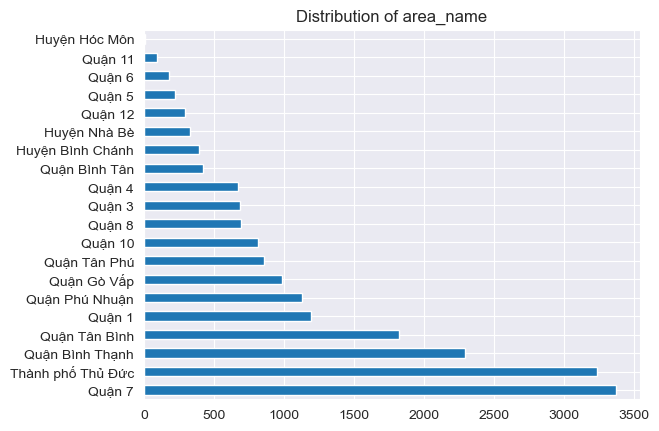

In [55]:
area = apartment_df['area_name'].value_counts()
area.plot.barh(title='Distribution of area_name')

Trên đây là phân bố căn hộ cho thuê theo quận sắp xếp theo số lượn giảm dần:
+ Nhiều nhất là quận 7 với hơn 3 nghìn tin cho thuê, tiếp theo là thành phố Đức (quận Thủ Đức + quận 9 + quận 2) diện tích rất lớn nhưng vẫn ít phòng cho thuê hơn quận 7
+ Huyện Hóc Môn xếp bét bảng với chỉ 4 tin, cũng hợp lý vì chả ai qua thuê bên đấy làm gì cả

#### Cột **owner**

In [16]:
apartment_df['owner'].value_counts()

False    19676
Name: owner, dtype: int64

Tất cả đề là False, có nghĩa là không có chủ nhà nào đăng tin cho thuê, tất cả đều là môi giới, nếu thuê thì sẽ khó thương lượng giảm giá với chủ nhà đuợc vì họ thường phải trả cho môi giới một khoản phí

Ta cũng loại bỏ cột này luôn

In [17]:
apartment_df = apartment_df.drop(['owner'], axis=1)

#### Cột **apartment_type**

<AxesSubplot:title={'center':'No. of number per type'}>

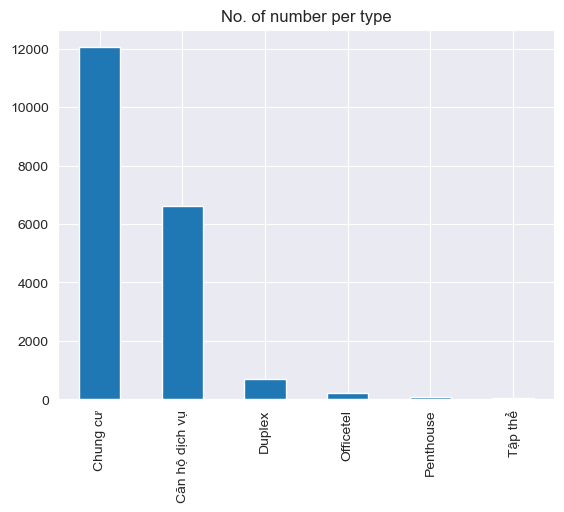

In [48]:
type = apartment_df['apartment_type'].value_counts()

type.plot.bar(title="No. of number per type")

+ Đa số là căn hộ chung cư, tiếp theo là tới các căn hộ dịch vụ
+ Penthouse, dupplex khá ít, vì giá cao nên sẽ có ít người có nhu cầu thuê những loại hình này
+ Căn hộ tập thể cực ít vì chắc chả ai thuê

#### Cột **zero_deposit**

In [19]:
apartment_df['zero_deposit'].value_counts()

False    19672
True         4
Name: zero_deposit, dtype: int64

Gần như chủ nhà sẽ yêu cầu tiền cọc, chủ có 4 tin không cần cọc nhưng mà khả năng cũng là do quên điền lúc tạo tin. Ta sẽ bỏ qua cột này luôn!

In [20]:
apartment_df = apartment_df.drop(['zero_deposit'], axis=1)

#### Cột **list_time**

In [21]:
pd.to_datetime(apartment_df['list_time']).dt.date.value_counts()

2022-12-02    1715
2022-12-03    1653
2022-12-01    1515
2022-11-22    1363
2022-11-23    1361
2022-11-30    1357
2022-11-28    1343
2022-11-29    1341
2022-11-24    1322
2022-11-25    1315
2022-11-21    1208
2022-11-26    1140
2022-11-19    1024
2022-11-20     895
2022-11-27     814
2022-11-18     310
Name: list_time, dtype: int64

Các tin được đăng từ 18/11 tới 3/12, trong khoảng 2 tuần, nên có thể coi dữ liệu là mới, tính ở thời điểm phân tích là ngày 3/12. Ta cũng có thể bỏ cột này luôn vì nó không có quá nhiều ý nghĩa khi gần nhau

In [22]:
apartment_df = apartment_df.drop(['list_time'], axis=1)

## 3. Đặt ra các câu hỏi?

### Câu 1. Giá thuê căn hộ ở các quận chênh lệch như thế nào?

### Câu 2. Các yếu tố ảnh hưởng tới giá thuê nhà?

### Câu 3. Tìm một căn hộ phù hợp để thuê?

## 4. Phân tích dữ liệu và trả lời từng câu hỏi

## 5. Tổng hợp lại quá trình thực hiện đồ án